In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
os.chdir('..')
exp = pd.read_csv('./results/experiment.csv')
exp.columns = exp.columns.str.lstrip()
exp['Instance'] = exp['Instance'].str.split('/',expand=True)[2]
exp = exp.sort_values(by='Time',ascending=False)

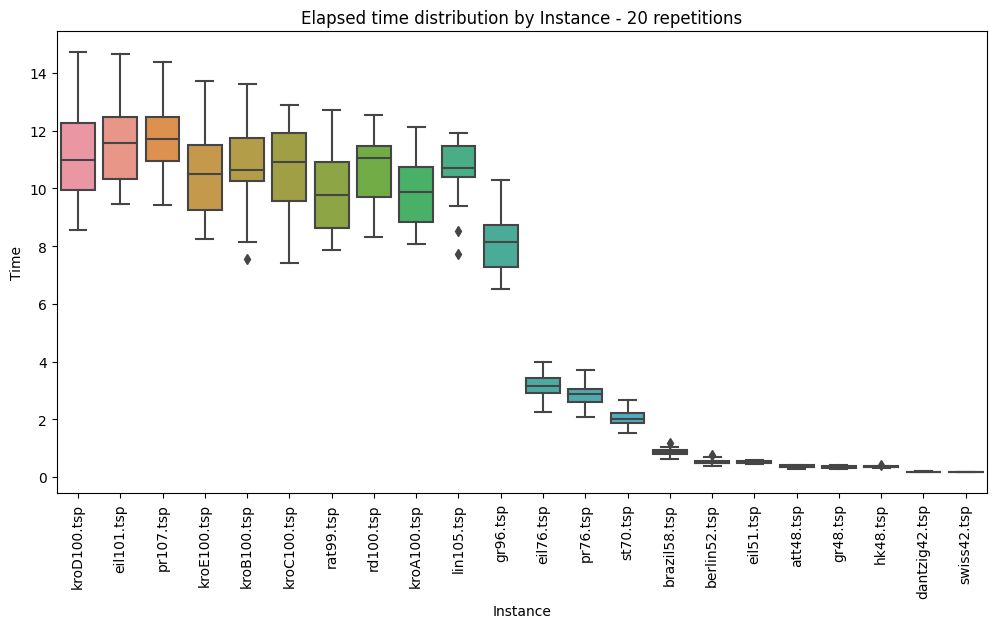

In [13]:
plt.figure(figsize=(12,6))
chart = sns.boxplot(data=exp,x='Instance',y='Time')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Elapsed time distribution by Instance - 20 repetitions')
plt.savefig('./results/time_distribution.png',bbox_inches = 'tight')

In [4]:
median_df = exp.groupby(by='Instance').median()['Time'].reset_index()
median_df['Time'] = np.round(median_df['Time'],2)
median_df = median_df.sort_values(by='Time',ascending=False)

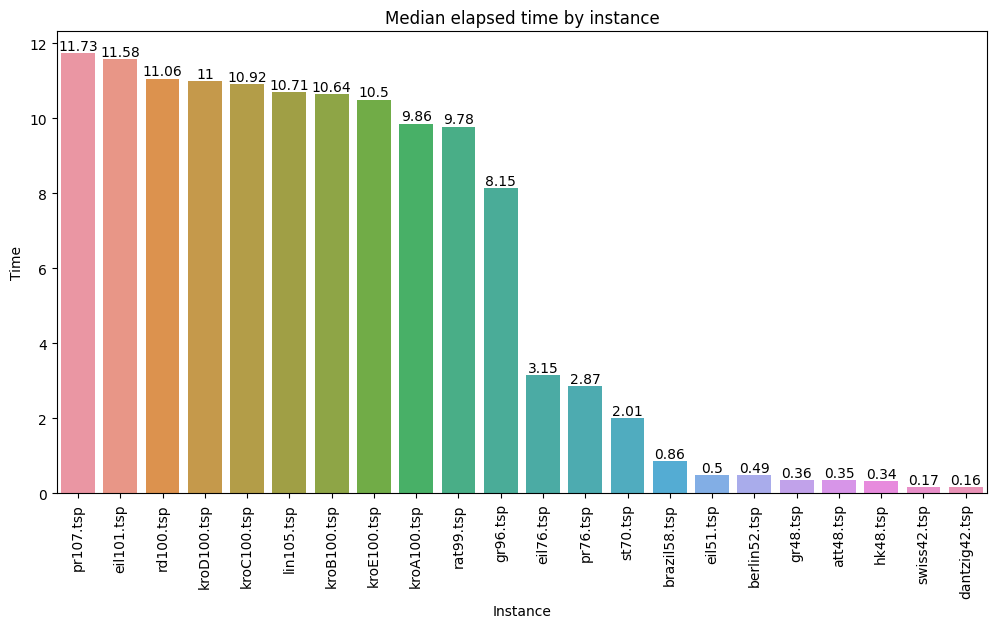

In [9]:
plt.figure(figsize=(12,6))
chart = sns.barplot(data=median_df, x='Instance',y='Time')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title('Median elapsed time by instance')
plt.savefig('./results/time_median.png',bbox_inches = 'tight')